In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

#### Load the Dataset

In [17]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
x = df.iloc[:,[3,4]].values

#### Using dendogram to find optimal number of clusters'

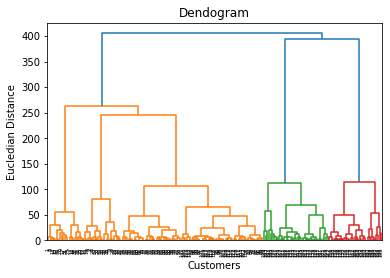

In [25]:
import scipy.cluster.hierarchy as sch

dendogram = sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Eucledian Distance')
# plt.xticks(rotation=45)
plt.show()

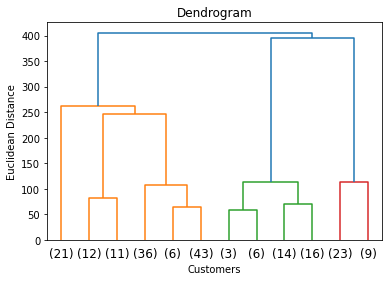

In [26]:
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'), truncate_mode='lastp', p=12)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

#### Training Hierarchical Clustering model on dataset

In [29]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(x)
print(y_hc)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


#### Visualing Clusters

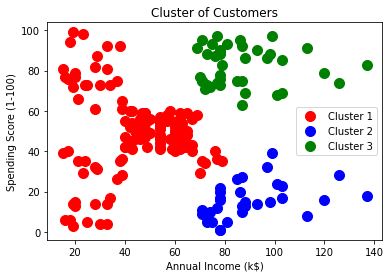

In [31]:
plt.scatter(x[y_hc == 0,0],x[y_hc == 0,1],s=100,c='red',label='Cluster 1')     # after , is index 
plt.scatter(x[y_hc == 1,0],x[y_hc == 1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(x[y_hc == 2,0],x[y_hc == 2,1],s=100,c='green',label='Cluster 3')
plt.title('Cluster of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()